# Basic data analysis


In [1]:
import pandas as pd
import json
from datetime import datetime
from pandas import json_normalize

import matplotlib.pyplot as plt
import seaborn as sb 

In [2]:
#with open('data/data.json','r') as f:
 #   data = json.loads(f.read())

In [3]:
# Read data in dataframe format
with open('data/data.json','r') as f:
    data = json.loads(f.read())

# Flatten data due to nested lists
df = pd.json_normalize(data, record_path =['data'])

In [4]:
df.head()

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9855,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.865467e+07,1.865467e+07,...,20.709635,43.827507,193.057943,1.054908e+12,2021-03-15T15:31:07.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6206,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, coinbase-vent...",NaN,1.150606e+08,1.150606e+08,...,-0.948127,49.324337,204.827054,2.051359e+11,2021-03-15T15:31:02.000Z,2502.0,Heco,HT,huobi-token,0x64ff637fb478863b7468bc97d30a5bf3a428a1fd
2,1839,Binance Coin,BNB,binance-coin,594,2017-07-25T00:00:00.000Z,"[marketplace, payments]",1.705328e+08,1.545328e+08,1.705328e+08,...,97.252411,514.972134,762.469639,3.959703e+10,2021-03-15T15:31:09.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether,USDT,tether,11430,2015-02-25T00:00:00.000Z,"[store-of-value, payments, stablecoin, stablec...",NaN,3.851557e+10,3.903817e+10,...,-0.018534,0.019659,0.037322,3.853312e+10,2021-03-15T15:31:17.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,2010,Cardano,ADA,cardano,259,2017-10-01T00:00:00.000Z,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.194831e+10,4.500000e+10,...,16.916783,229.955277,578.236188,3.331593e+10,2021-03-15T15:31:19.000Z,NaN,NaN,NaN,NaN,NaN


In [5]:
df.rename(columns={
                'date_added': 'date',
                'quote.USD.price': 'price'
}, inplace=True)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            4332 non-null   int64  
 1   name                          4332 non-null   object 
 2   symbol                        4332 non-null   object 
 3   slug                          4332 non-null   object 
 4   num_market_pairs              4332 non-null   int64  
 5   date                          4332 non-null   object 
 6   tags                          4332 non-null   object 
 7   max_supply                    2084 non-null   float64
 8   circulating_supply            4332 non-null   float64
 9   total_supply                  4332 non-null   float64
 10  platform                      0 non-null      float64
 11  cmc_rank                      4332 non-null   int64  
 12  last_updated                  4332 non-null   object 
 13  pri

In [7]:
# Convert date format
def convert_date(d):
     new_format = datetime.strptime(d,"%Y-%m-%dT%H:%M:%S.%fZ")
     return new_format.date()
convert_date("2013-04-28T00:00:00.000Z")

datetime.date(2013, 4, 28)

In [8]:
# Convert date to the datetime type
df['date'] = df['date'].apply(convert_date)

In [9]:
df.head()

,id,name,symbol,slug,num_market_pairs,date,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,9855,2013-04-28,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.865467e+07,1.865467e+07,...,20.709635,43.827507,193.057943,1.054908e+12,2021-03-15T15:31:07.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,6206,2015-08-07,"[mineable, pow, smart-contracts, coinbase-vent...",NaN,1.150606e+08,1.150606e+08,...,-0.948127,49.324337,204.827054,2.051359e+11,2021-03-15T15:31:02.000Z,2502.0,Heco,HT,huobi-token,0x64ff637fb478863b7468bc97d30a5bf3a428a1fd
2,1839,Binance Coin,BNB,binance-coin,594,2017-07-25,"[marketplace, payments]",1.705328e+08,1.545328e+08,1.705328e+08,...,97.252411,514.972134,762.469639,3.959703e+10,2021-03-15T15:31:09.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether,USDT,tether,11430,2015-02-25,"[store-of-value, payments, stablecoin, stablec...",NaN,3.851557e+10,3.903817e+10,...,-0.018534,0.019659,0.037322,3.853312e+10,2021-03-15T15:31:17.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,2010,Cardano,ADA,cardano,259,2017-10-01,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.194831e+10,4.500000e+10,...,16.916783,229.955277,578.236188,3.331593e+10,2021-03-15T15:31:19.000Z,NaN,NaN,NaN,NaN,NaN


In [10]:
df['date'] =  pd.to_datetime(df['date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4332 entries, 0 to 4331
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   id                            4332 non-null   int64         
 1   name                          4332 non-null   object        
 2   symbol                        4332 non-null   object        
 3   slug                          4332 non-null   object        
 4   num_market_pairs              4332 non-null   int64         
 5   date                          4332 non-null   datetime64[ns]
 6   tags                          4332 non-null   object        
 7   max_supply                    2084 non-null   float64       
 8   circulating_supply            4332 non-null   float64       
 9   total_supply                  4332 non-null   float64       
 10  platform                      0 non-null      float64       
 11  cmc_rank                      

* After converting the date column to the datetime format, it is usually a good idea to inedex our df by the date, creating the DatetimeIndex which is a special index type designed to work with dates and times

In [12]:
# set index
df.set_index('date', inplace=True)

In [13]:
df.head(5)

,id,name,symbol,slug,num_market_pairs,tags,max_supply,circulating_supply,total_supply,platform,...,quote.USD.percent_change_30d,quote.USD.percent_change_60d,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
date,,,,,,,,,,,,,,,,,,,,,
2013-04-28,1,Bitcoin,BTC,bitcoin,9855,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.865467e+07,1.865467e+07,NaN,...,20.709635,43.827507,193.057943,1.054908e+12,2021-03-15T15:31:07.000Z,NaN,NaN,NaN,NaN,NaN
2015-08-07,1027,Ethereum,ETH,ethereum,6206,"[mineable, pow, smart-contracts, coinbase-vent...",NaN,1.150606e+08,1.150606e+08,NaN,...,-0.948127,49.324337,204.827054,2.051359e+11,2021-03-15T15:31:02.000Z,2502.0,Heco,HT,huobi-token,0x64ff637fb478863b7468bc97d30a5bf3a428a1fd
2017-07-25,1839,Binance Coin,BNB,binance-coin,594,"[marketplace, payments]",1.705328e+08,1.545328e+08,1.705328e+08,NaN,...,97.252411,514.972134,762.469639,3.959703e+10,2021-03-15T15:31:09.000Z,NaN,NaN,NaN,NaN,NaN
2015-02-25,825,Tether,USDT,tether,11430,"[store-of-value, payments, stablecoin, stablec...",NaN,3.851557e+10,3.903817e+10,NaN,...,-0.018534,0.019659,0.037322,3.853312e+10,2021-03-15T15:31:17.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
2017-10-01,2010,Cardano,ADA,cardano,259,"[mineable, dpos, pos, platform, research, smar...",4.500000e+10,3.194831e+10,4.500000e+10,NaN,...,16.916783,229.955277,578.236188,3.331593e+10,2021-03-15T15:31:19.000Z,NaN,NaN,NaN,NaN,NaN


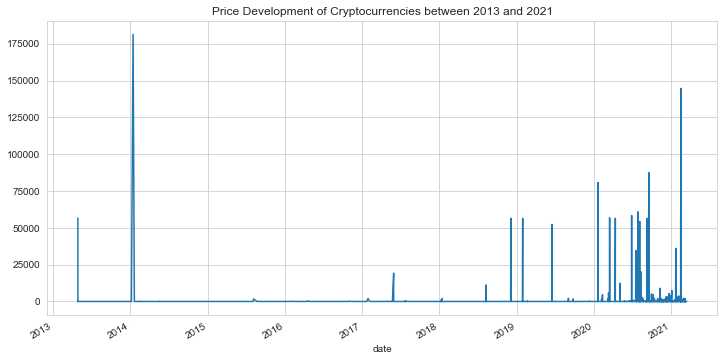

In [14]:
sb.set_style("whitegrid") 
plt.rcParams['figure.figsize'] = [12, 6]

df['price'].plot(title='Price Development of Cryptocurrencies between 2013 and 2021')
plt.show()

In [15]:
df.to_csv("data/processed_data.csv")